In [1]:
import numpy as np
import pandas as pd
import risk_kit as erk
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
erk.bond_cash_flows(3,100,0.03,2)
#maturity - 3 years
#initial value = 100
#per year = 3%
#2 times a year = 6 payments the last woth the principal

1      1.5
2      1.5
3      1.5
4      1.5
5      1.5
6    101.5
dtype: float64

In [3]:
erk.bond_price(20,1000,0.05,2, 0.04)
#maturity - 20 years
#initial value = 1000
#per year = 5%
#2 times a year =  payments the last woth the principal
#price of today 0.05

0    1136.777396
dtype: float64

In [4]:
erk.pv(flows=erk.bond_cash_flows(20,1000,0.05,2), r = 0.04/2)

0    1136.777396
dtype: float64

In [5]:
erk.bond_price(20,1000,0.05,2, 0.05)

0    1000.0
dtype: float64

In [6]:
erk.bond_price(20,1000,0.05,2, 0.02)

0    1492.520292
dtype: float64

In [7]:
rates = np.linspace(0.01,.1, num= 20)

In [8]:
prices = [erk.bond_price(10,1000, .05, 2, rate) for rate in rates]

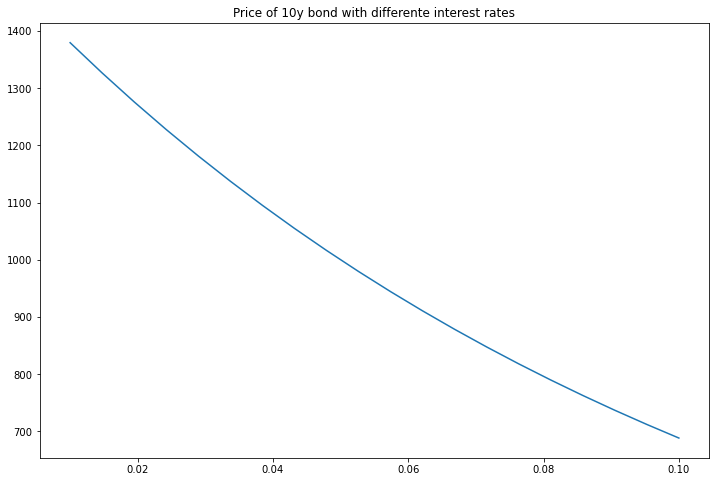

In [9]:
pd.DataFrame(data = prices , index = rates).plot(title = "Price of 10y bond with differente interest rates", legend = False, figsize = (12,8))

In [10]:
cf = erk.bond_cash_flows(3,1000,0.06,2)
cf

1      30.0
2      30.0
3      30.0
4      30.0
5      30.0
6    1030.0
dtype: float64

In [18]:
discounts = erk.discount(cf.index, r = 0.06/2)
discounts

,0
1,0.970874
2,0.942596
3,0.915142
4,0.888487
5,0.862609
6,0.837484


In [20]:
dcf  = discounts[0]*cf
dcf

1     29.126214
2     28.277877
3     27.454250
4     26.654611
5     25.878264
6    862.608784
dtype: float64

In [21]:
weights = dcf/dcf.sum()
weights

1    0.029126
2    0.028278
3    0.027454
4    0.026655
5    0.025878
6    0.862609
dtype: float64

In [22]:
duration = (cf.index*weights).sum()


In [28]:
# the period of payments is 6 , but the average to get the money back is 5,57
duration /2

2.789853593597267

In [27]:
erk.macaulay_duration(erk.bond_cash_flows(3,1000,.06,2), .06/2)/2

2.789853593597267

### Duration matching

In [29]:
#need to pay 100000 in 10 and 12 years
liabilities = pd.Series (data = [100000, 100000], index = [10,12])
#r = 0.04 per year
erk.macaulay_duration(liabilities,.04)

10.960799385088393

In [32]:
#now = 0.04 py, the bonds pay 0.05% py
md_10 = erk.macaulay_duration(erk.bond_cash_flows(10,1000,0.05,1), 0.04)
md_20 = erk.macaulay_duration(erk.bond_cash_flows(20,1000,0.05,1), 0.04)
md_10, md_20

(8.190898824083233, 13.544718122145921)

In our case, the fraction in the short duration asset $w_s$ should be such that:
    
$$ w_s \times 8.19 + (1-w_s) \times 13.54 = 10.96 $$

more generally:

$$ w_s \times d_s + (1-w_s) \times d_l = d_t $$
    
rearranging gives:

 $$ w_s = \frac{d_l-d_t}{d_l-d_s} $$

In [30]:
short_bond = erk.bond_cash_flows(10,1000,0.05,1)
long_bond = erk.bond_cash_flows(20,1000,0.05,1)
w_s = erk.match_durations(liabilities, short_bond, long_bond, 0.04)
w_s

0.48263092069478974

In [31]:
p_short = erk.bond_price(10,1000,0.05,1,0.04)
p_long = erk.bond_price(20,1000,0.05,1,0.04)
a_0 = 130_000
p_flows = pd.concat([a_0*w_s*short_bond/p_short, a_0*(1-w_s)*long_bond/p_long])
erk.macaulay_duration(p_flows,0.04)

nan

#### funding ratio

In [ ]:
cfr = erk.funding_ratio(p_flows,liabilities, 0.04)
cfr

In [ ]:
rates = np.linspace(0,0.1,20)

In [ ]:
sb_assets = a_0*short_bond/p_short # put 100% in short bonds
lb_assets = a_0*long_bond/p_long # put 100% (a_0) in long bonds

fr_change = pd.DataFrame({
    'Long Bond': [erk.funding_ratio(lb_assets, liabilities, r) for r in rates],
    'Short Bond': [erk.funding_ratio(sb_assets, liabilities, r) for r in rates],
    'Duration Matching Bond': [erk.funding_ratio(p_flows, liabilities, r) for r in rates]
    
})


In [ ]:
fr_change.plot(title = 'Funding Rations with changes in interest rates', figsize = (12,6))